# Reverse engineering ngmix' gaussian moments

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ngmix
import autometacal

Get a galaxy:

In [3]:
gal, psf = autometacal.data.galaxies.make_data(img_noise=0.001,gal_g1=[0.2],gal_g2=[0.])

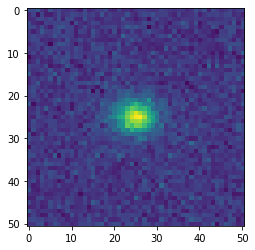

In [4]:
imshow(gal.numpy()[0])

Set a fitter with Gaussian moments:

In [22]:
weight_fwhm = 1.2
fitter = ngmix.gaussmom.GaussMom(fwhm=weight_fwhm)
psf_fitter = ngmix.gaussmom.GaussMom(fwhm=weight_fwhm)


In [23]:
obs=ngmix.Observation(gal.numpy()[0])

In [9]:
fitter._measure_moments(obs)

{'flags': 0,
 'npix': 2601,
 'wsum': 1.6706505883799125,
 'sums': array([-2.54577813e-04,  2.50707747e-04,  3.82815390e-04,  1.69230218e-05,
         1.14479158e-02,  2.67032991e-02]),
 'sums_cov': array([[ 4.43347585e-02,  6.78187692e-21, -1.35702190e-19,
          1.35617456e-20, -1.55991824e-19, -1.68057271e-18],
        [ 6.78187692e-21,  4.43347585e-02, -6.43763098e-20,
          3.33780411e-20, -5.10081244e-20,  1.74150585e-18],
        [-1.35702190e-19, -6.43763098e-20,  8.50627684e-02,
          6.01159860e-24,  1.14187922e-19,  1.22729489e-18],
        [ 1.35617456e-20,  3.33780411e-20,  6.01159860e-24,
          7.23395244e-03,  1.14822467e-19,  1.35637538e-20],
        [-1.55991824e-19, -5.10081244e-20,  1.14187922e-19,
          1.14822467e-19,  9.22967208e-02,  8.86695171e-02],
        [-1.68057271e-18,  1.74150585e-18,  1.22729489e-18,
          1.35637538e-20,  8.86695171e-02,  1.08685858e+00]]),
 'pars': array([-0.00953357,  0.00938864,  0.01433588,  0.00063374,  0.4287

## How it works?

go(obs) calls:

In [49]:
res=fitter.weight.get_weighted_moments(obs=obs, maxrad=0)

which calls:

In [25]:
fitter.weight.get_weighted_sums(obs,maxrad=40)

(0, 2601, 1.67065059, [-2.54577813e-04,  2.50707747e-04,  3.82815390e-04,  1.69230218e-05,  1.14479158e-02,  2.67032991e-02], [[ 4.43347585e-02,  6.78187692e-21, -1.35702190e-19,  1.35617456e-20, -1.55991824e-19, -1.68057271e-18], [ 6.78187692e-21,  4.43347585e-02, -6.43763098e-20,  3.33780411e-20, -5.10081244e-20,  1.74150585e-18], [-1.35702190e-19, -6.43763098e-20,  8.50627684e-02,  6.01159860e-24,  1.14187922e-19,  1.22729489e-18], [ 1.35617456e-20,  3.33780411e-20,  6.01159860e-24,  7.23395244e-03,  1.14822467e-19,  1.35637538e-20], [-1.55991824e-19, -5.10081244e-20,  1.14187922e-19,  1.14822467e-19,  9.22967208e-02,  8.86695171e-02], [-1.68057271e-18,  1.74150585e-18,  1.22729489e-18,  1.35637538e-20,  8.86695171e-02,  1.08685858e+00]], [0., 0., 0., 0., 0., 0.], [2.50e+01, 2.50e+01, 0.00e+00, 1.25e+03, 1.25e+03, 1.00e+00])

weight is a GMix object, we need to get the settings of the object to the numba function:

In [26]:
wt_gm = fitter.weight.get_data()

In [27]:
wt_gm

array([(1.63164965, 0., 0., 0.25968511, 0., 0.25968511, 0.06743635, 1, 3.85081767, 0., 3.85081767, 0.61287667, 1.)],
      dtype=[('p', '<f8'), ('row', '<f8'), ('col', '<f8'), ('irr', '<f8'), ('irc', '<f8'), ('icc', '<f8'), ('det', '<f8'), ('norm_set', '<i8'), ('drr', '<f8'), ('drc', '<f8'), ('dcc', '<f8'), ('norm', '<f8'), ('pnorm', '<f8')])

In [28]:
ngmix.gmix.gmix_nb.get_weighted_sums(wt_gm,obs.pixels,res,40)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /local/home/az264973/github/ngmix/ngmix/gmix/gmix_nb.py (678)

File "../../ngmix/ngmix/gmix/gmix_nb.py", line 678:
def get_weighted_sums(wt, pixels, res, maxrad):
    <source elided>

    maxrad2 = maxrad ** 2
    ^

This error may have been caused by the following argument(s):
- argument 2: Cannot determine Numba type of <class 'dict'>

This error may have been caused by the following argument(s):
- argument 2: Cannot determine Numba type of <class 'dict'>


In [60]:
res = {'flags': 0,
 'npix': 0,
 'wsum': 0,
 'sums': array([0,  0,  0,  0, 0,  0]),
 'sums_cov': zeros([6,6]),
 'pars': array([0., 0., 0., 0., 0., 0.]),
 'F': array([0,0,0,0,0,0]),
 'flux': 0.0,
 'flux_err': 9999.0,
 'T': -9999.0,
 's2n': -9999.0,
 'e': array([-9999., -9999.]),
 'e_err': array([9999., 9999.]),
 'e_cov': array([[9999.,    0.],
        [   0., 9999.]]),
 'flagstr': 'zero var'}

Ok, let's get the function without numba:

In [61]:
def get_weighted_sums(wt, pixels, res, maxrad):
    """
    do sums for calculating the weighted moments
    """

    maxrad2 = maxrad ** 2

    vcen = wt["row"][0]
    ucen = wt["col"][0]
    F = res["F"]

    n_pixels = pixels.size
    for i_pixel in range(n_pixels):

        pixel = pixels[i_pixel]

        vmod = pixel["v"] - vcen
        umod = pixel["u"] - ucen

        rad2 = umod * umod + vmod * vmod
        if rad2 < maxrad2:

            weight = gmix_eval_pixel(wt, pixel)
            var = 1.0 / (pixel["ierr"] * pixel["ierr"])

            wdata = weight * pixel["val"]
            w2 = weight * weight

            F[0] = pixel["v"]
            F[1] = pixel["u"]
            F[2] = umod * umod - vmod * vmod
            F[3] = 2 * vmod * umod
            F[4] = rad2
            F[5] = 1.0

            res["wsum"] += weight
            res["npix"] += 1

            for i in range(6):
                res["sums"][i] += wdata * F[i]
                for j in range(6):
                    res["sums_cov"][i, j] += w2 * var * F[i] * F[j]

In [64]:
get_weighted_sums(wt_gm,obs.pixels,res,40)

In [65]:
res

{'flags': 0,
 'npix': 5202,
 'wsum': 3.3413011767598264,
 'sums': array([0, 0, 0, 0, 0, 0]),
 'sums_cov': array([[ 8.86695171e-02,  6.78187692e-21, -1.35702190e-19,
          1.35617456e-20, -1.55991824e-19, -1.68057271e-18],
        [ 6.78187692e-21,  8.86695171e-02, -6.43763098e-20,
          3.33780411e-20, -5.10081244e-20,  1.74150585e-18],
        [-1.35702190e-19, -6.43763098e-20,  1.70125537e-01,
          1.26290435e-23,  1.14187922e-19,  4.69674184e-18],
        [ 1.35617456e-20,  3.33780411e-20,  1.26290435e-23,
          1.44679049e-02,  1.14822467e-19,  1.35637538e-20],
        [-1.55991824e-19, -5.10081244e-20,  1.14187922e-19,
          1.14822467e-19,  1.84593442e-01,  1.77339034e-01],
        [-1.68057271e-18,  1.74150585e-18,  4.69674184e-18,
          1.35637538e-20,  1.77339034e-01,  2.17371715e+00]]),
 'pars': array([0., 0., 0., 0., 0., 0.]),
 'F': array([  25,   25,    0, 1250, 1250,    1]),
 'flux': 0.0,
 'flux_err': 9999.0,
 'T': -9999.0,
 's2n': -9999.0,
 'e': a

Ok, we need gmix_eval_pixel...

In [57]:
def gmix_eval_pixel(gmix, pixel):
    """
    evaluate a single gaussian mixture
    """
    model_val = 0.0
    for igauss in range(gmix.size):

        model_val += gauss2d_eval_pixel(gmix[igauss], pixel,)

    return model_val

And gauss2d_eval_pixel (I know exactly why: nvmix evaluated pixels invertedly from a round 2d gaussian...)

In [58]:
def gauss2d_eval_pixel(gauss, pixel):
    """
    evaluate a 2-d gaussian at the specified location
    parameters
    ----------
    gauss2d: gauss2d structure
        row,col,dcc,drr,drc,pnorm... See gmix.py
    pixel: struct with coods
        should have fields v,u
    """
    model_val = 0.0

    # v->row, u->col in gauss
    vdiff = pixel["v"] - gauss["row"]
    udiff = pixel["u"] - gauss["col"]

    chi2 = (
        gauss["dcc"] * vdiff * vdiff
        + gauss["drr"] * udiff * udiff
        - 2.0 * gauss["drc"] * vdiff * udiff
    )

    model_val = gauss["pnorm"] * numpy.exp(-0.5 * chi2) * pixel["area"]

    return model_val